# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,10)})

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-08,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,no,N
1,02-12-08,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,no,N
2,03-12-08,albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,no,Y
3,04-12-08,albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,no,No
4,05-12-08,albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,no,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145440 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
# from date convert to day, month
df['Date'] = pd.to_datetime(df['Date'])
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [6]:
# drop date
df.drop('Date', axis=1, inplace=True)

In [7]:
df['RainToday'].value_counts()

No     110314
Yes     31876
no          5
yes         4
Name: RainToday, dtype: int64

filter rain today column

In [8]:
df['RainToday'] = df['RainToday'].apply(lambda s : True if s=='yes' or s=='Yes' else False)

In [9]:
df['RainToday'].value_counts()

False    113580
True      31880
Name: RainToday, dtype: int64

In [10]:
df['RainTomorrow'].value_counts()

No     110312
Yes     31875
N           3
Y           3
Name: RainTomorrow, dtype: int64

same as rain today column

In [11]:
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda s : True if s=='Yes' or s=='Y' else False)

In [12]:
df['RainTomorrow'].value_counts()

False    113582
True      31878
Name: RainTomorrow, dtype: int64

In [13]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month', 'year'],
      dtype='object')

## What is the most rainy year ?

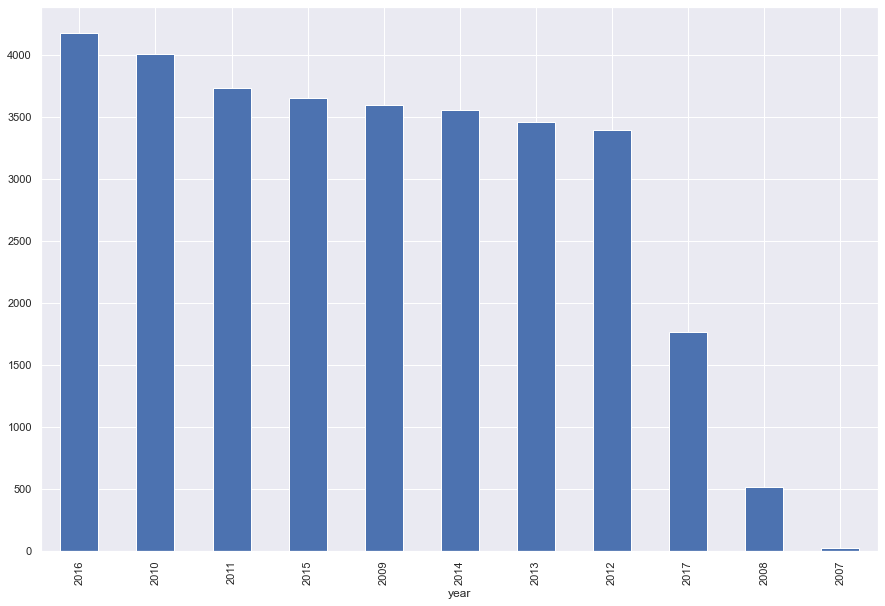

In [14]:
df.groupby('year').sum()['RainToday'].sort_values(ascending=False).plot(kind='bar');

- 2016 is the most year

## What are the rainiest months?

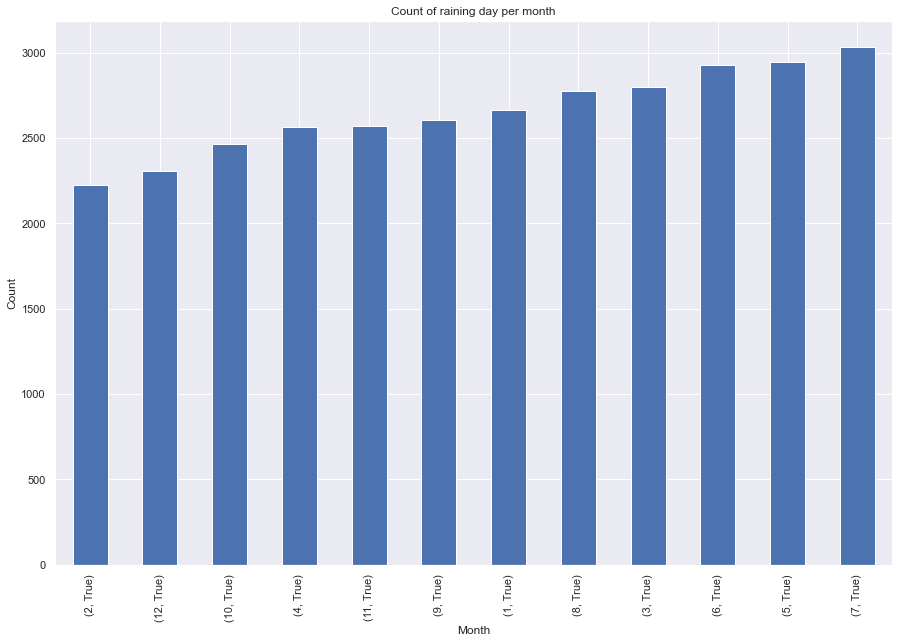

In [15]:
df.groupby(['month', 'RainToday']).count()['day'].sort_values()[:12].plot(kind='bar')
plt.title('Count of raining day per month')
plt.xlabel('Month')
plt.ylabel('Count');

- from the plot we can notice that it rain in all months and seventh month is the rainiest month.

## If it rain today must rain tomorrow or not ?

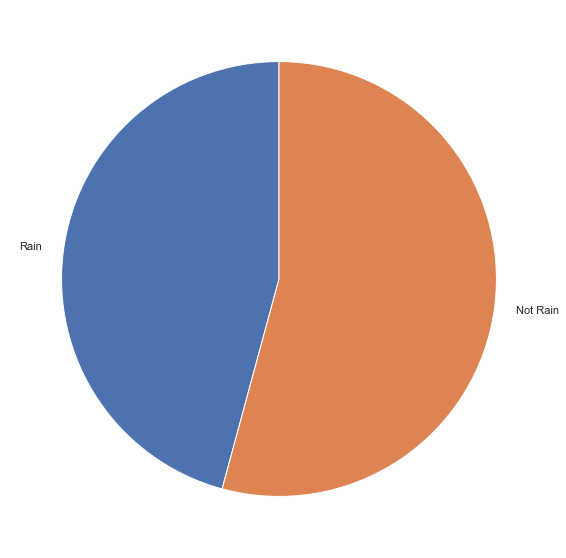

In [16]:
rain = df[df['RainToday'] == True].groupby('RainToday').sum()['RainTomorrow'] / df[df['RainToday'] == True].groupby('RainToday').count()['RainTomorrow']
not_rain = 1 - rain
y = np.array([rain.values[0], not_rain.values[0]])
mylabels = ["Rain", "Not Rain"]

plt.pie(y, labels = mylabels, startangle = 90)
plt.show() 

- less than the half of days rain today and tomorrow but it is not a low probabilty

## If it not rain today must rain tomorrow or not ?

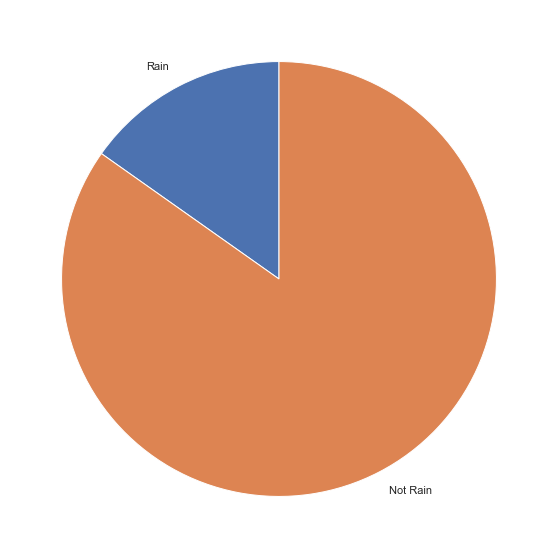

In [17]:
rain = df[df['RainToday'] == False].groupby('RainToday').sum()['RainTomorrow'] / df[df['RainToday'] == False].groupby('RainToday').count()['RainTomorrow']
not_rain = 1 - rain
y = np.array([rain.values[0], not_rain.values[0]])
mylabels = ["Rain", "Not Rain"]

plt.pie(y, labels = mylabels, startangle = 90)
plt.show() 

- if it didn't rain today so, there is a high prob that it will not rain tomorrow

In [18]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month', 'year'],
      dtype='object')

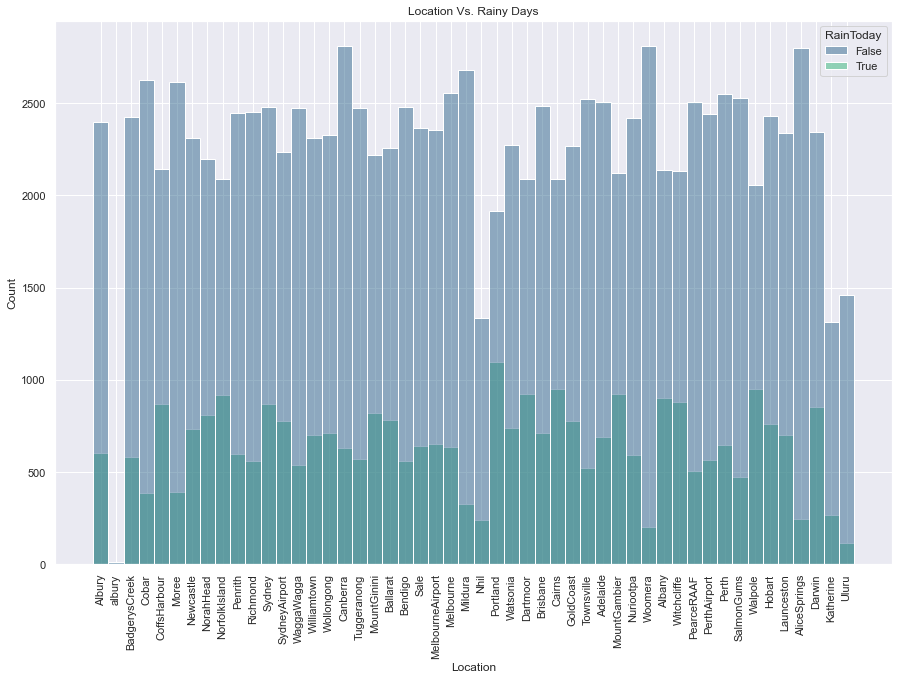

In [19]:
sns.histplot(data=df, x='Location', hue='RainToday', palette='viridis')
plt.title('Location Vs. Rainy Days')
plt.xticks(rotation=90);

- Portland is the most rainy city
- Uluru is the least rainy city

## Is there any correlation between temperature at 3pm and will rain tomorrow or not ?

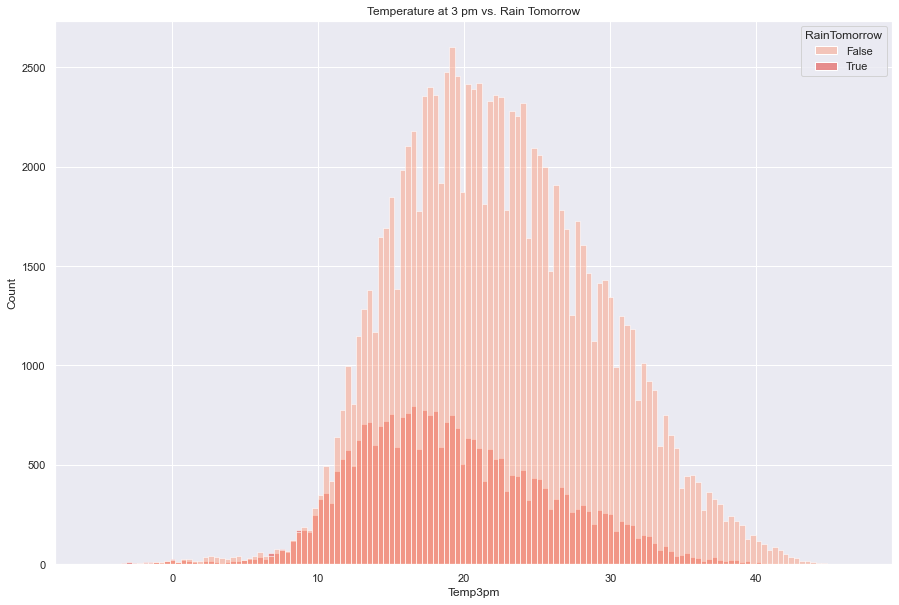

In [20]:
sns.histplot(data=df, x='Temp3pm', hue='RainTomorrow', palette='Reds')
plt.title('Temperature at 3 pm vs. Rain Tomorrow');

- when the temp is lower the prob of rain is high and the opposite

## Is there a correlation between min temperature and max ?

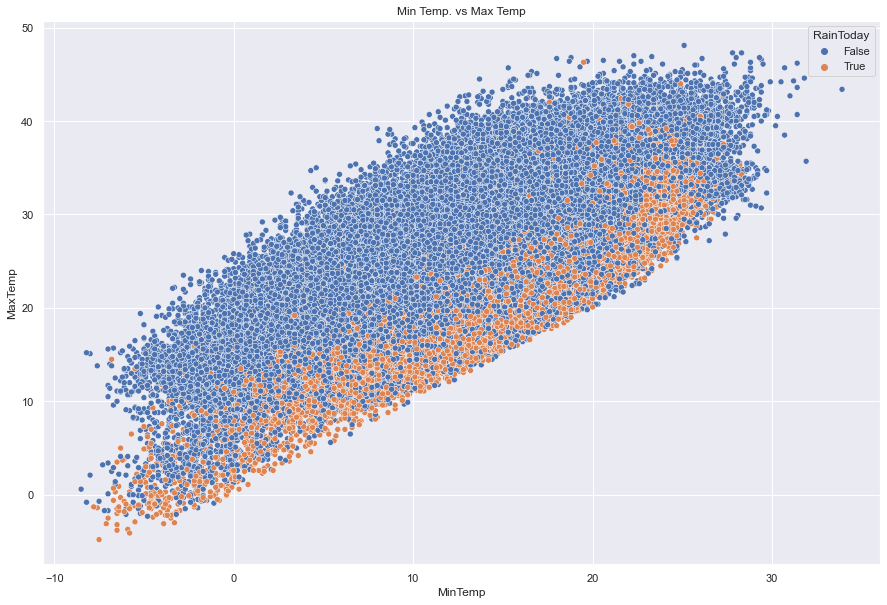

In [21]:
sns.scatterplot(data=df, x='MinTemp', y='MaxTemp', hue='RainToday')
plt.title('Min Temp. vs Max Temp');

- there is a positive coorelation between them

## From Cloud at 3 pm could predict if it will rain tomorrow ?

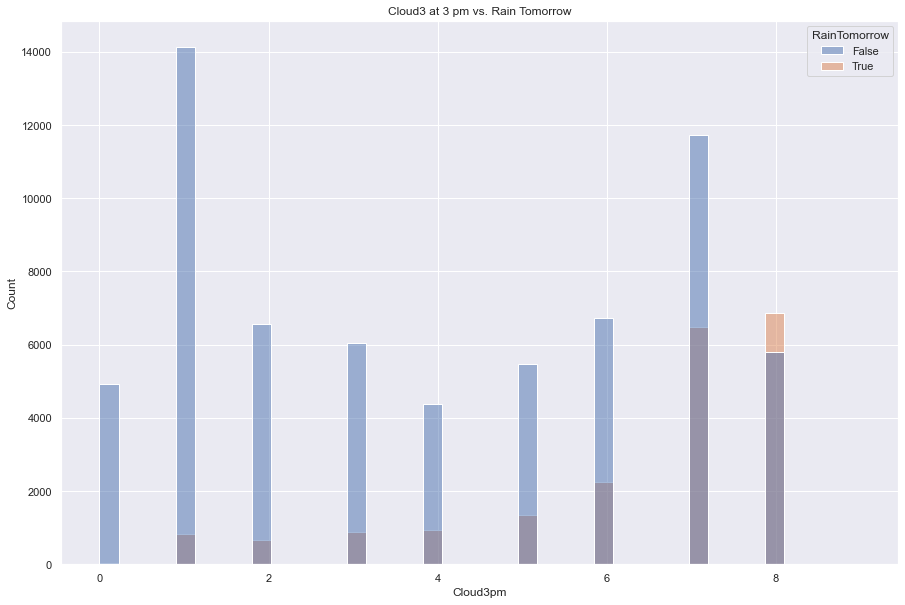

In [22]:
sns.histplot(data=df, x='Cloud3pm', hue='RainTomorrow')
plt.title('Cloud3 at 3 pm vs. Rain Tomorrow');

- more of cloud in 3 pm indicates for raining but it's difficult to decide

## From Pressure at 3 pm could predict if it will rain tomorrow ?

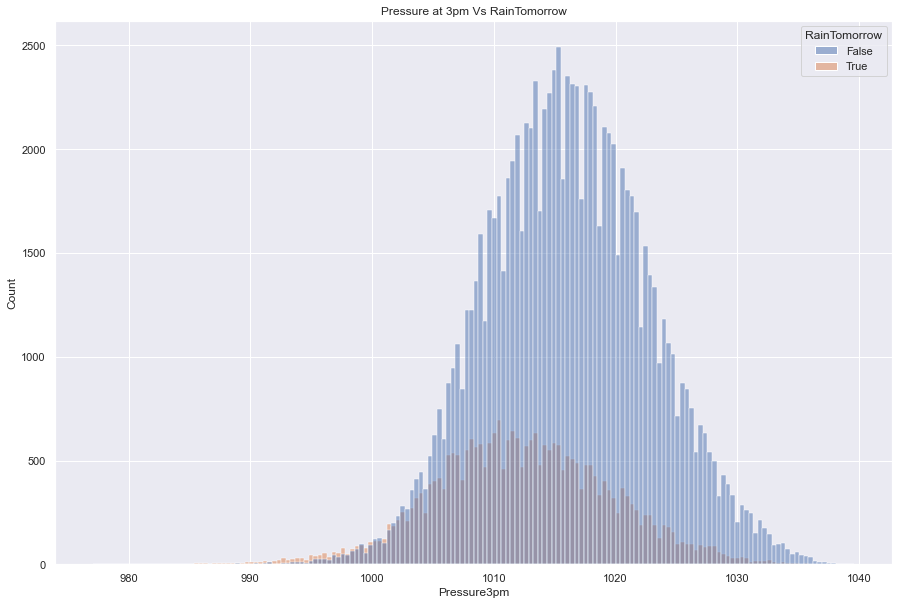

In [23]:
sns.histplot(data=df, x='Pressure3pm', hue='RainTomorrow')
plt.title('Pressure at 3pm Vs RainTomorrow');

- when the Pressure is lower the prob of rain is high and the opposite

## How long is Sunshine with rain tomorrow

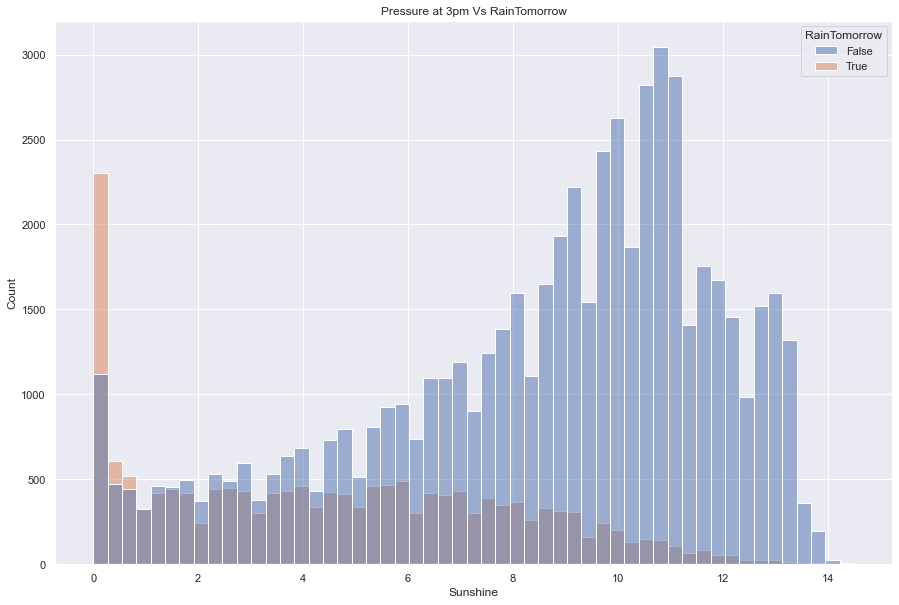

In [24]:
sns.histplot(data=df, x='Sunshine', hue='RainTomorrow')
plt.title('Pressure at 3pm Vs RainTomorrow');

- low sunshine time means high prob with raining tomorrow

## Check Wind speed at 3 pm with pressure , cloud and tempreture

<AxesSubplot:xlabel='Pressure3pm', ylabel='WindSpeed3pm'>

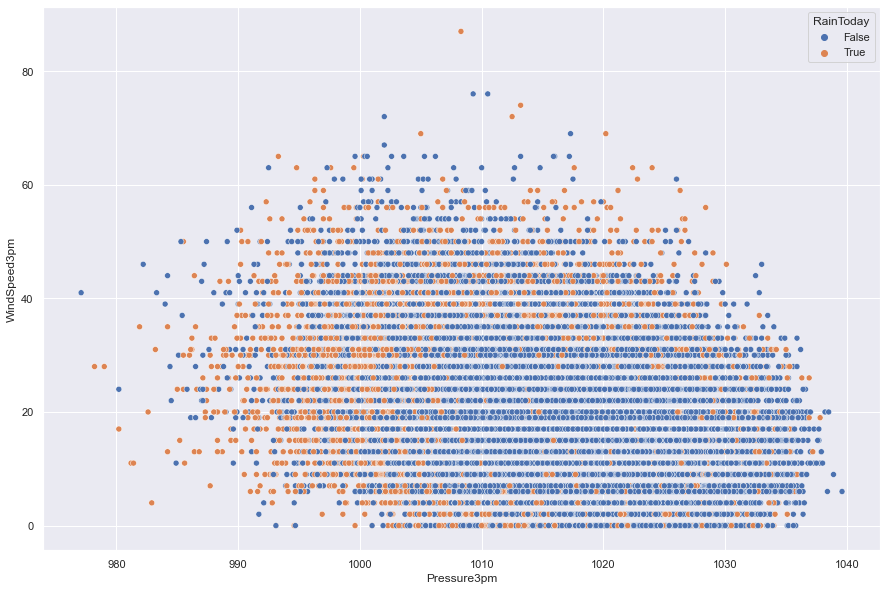

In [25]:
sns.scatterplot(data=df, x='Pressure3pm', y='WindSpeed3pm', hue='RainToday')

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Cloud3pm'>

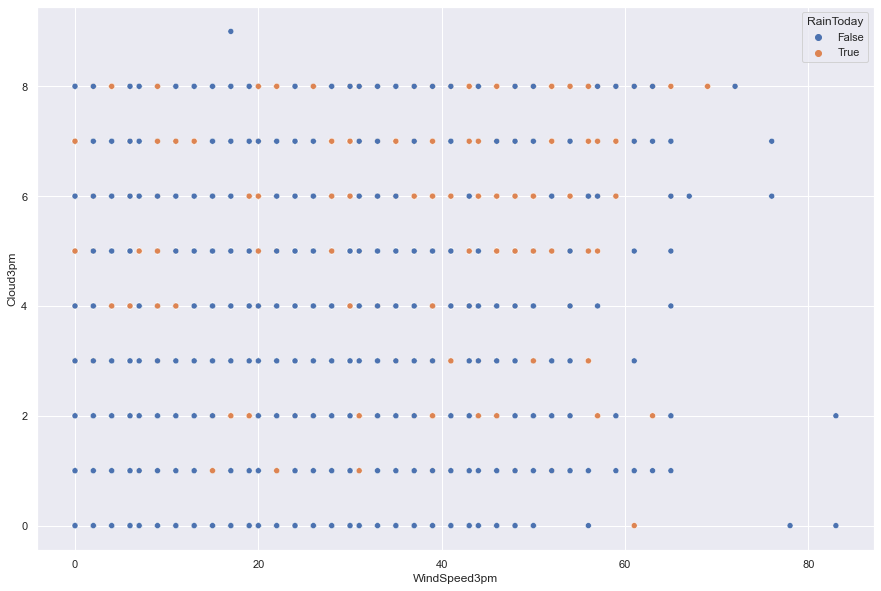

In [26]:
sns.scatterplot(data=df, y='Cloud3pm', x='WindSpeed3pm', hue='RainToday')

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Temp3pm'>

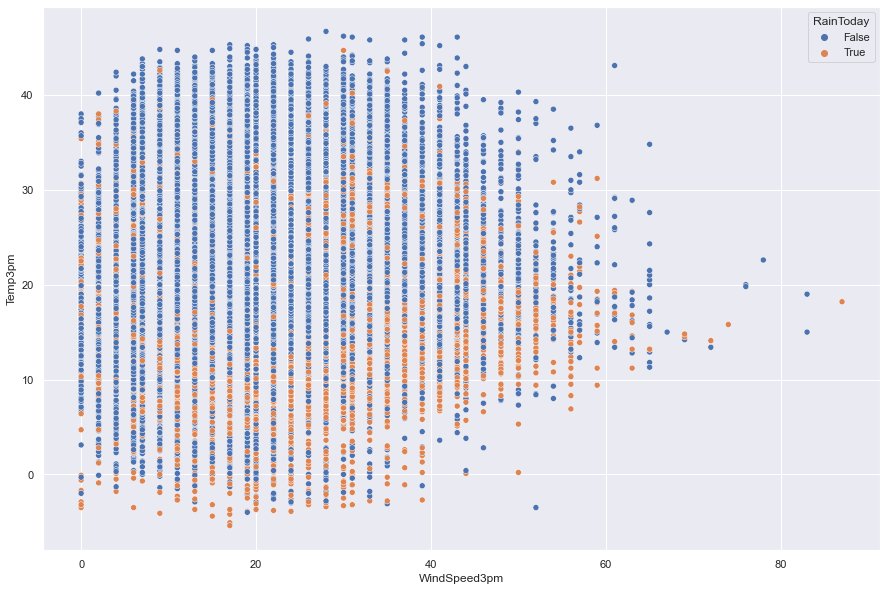

In [27]:
sns.scatterplot(data=df, y='Temp3pm', x='WindSpeed3pm', hue='RainToday')

<AxesSubplot:xlabel='Humidity3pm', ylabel='WindSpeed3pm'>

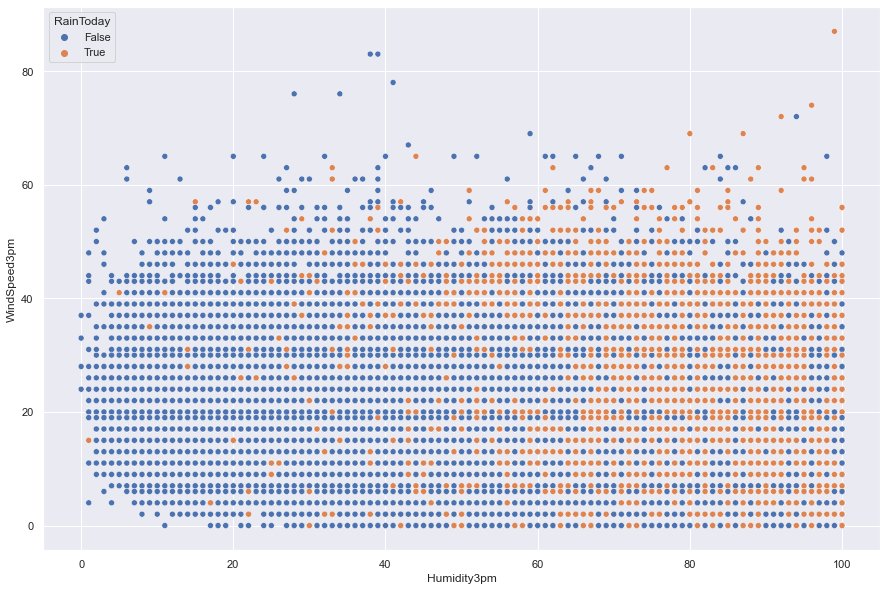

In [28]:
sns.scatterplot(data=df, x='Humidity3pm', y='WindSpeed3pm', hue='RainToday')

- There is Overlapping in data

## Rate of Raining

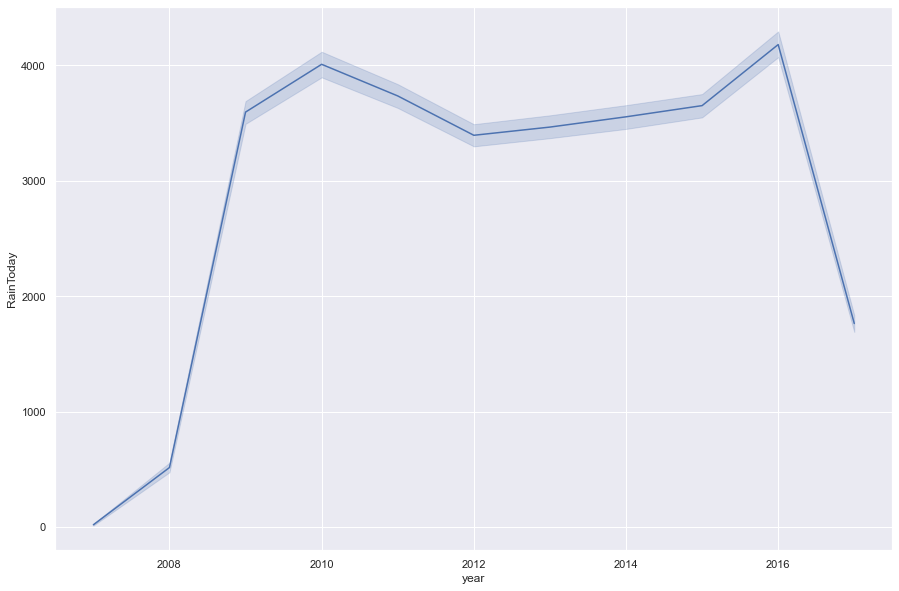

In [53]:
sns.lineplot(data=df, x="year", y="RainToday", estimator='sum');

## If there is a correlation between temp at 9 am and 3 pm

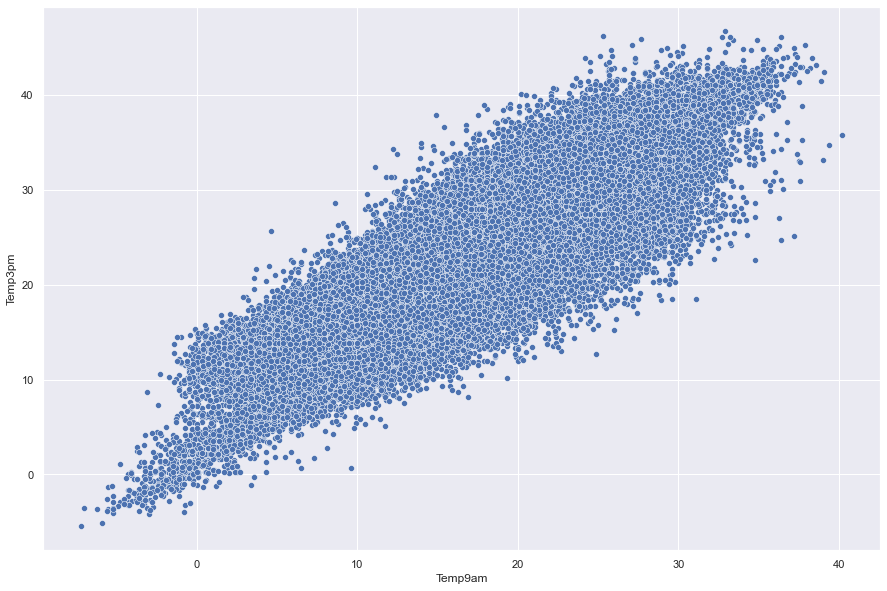

In [54]:
sns.scatterplot(x='Temp9am', y='Temp3pm', data=df);